<a href="https://colab.research.google.com/github/Esbern/conservation-agriculture/blob/main/SOC_analysis_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOC Analysis: Minimum vs. Conventional Tillage
This notebook contains analysis and plots of soil organic carbon (SOC) data comparing minimum tillage (MT) and conventional tillage (CT) practices.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


In [3]:
# Data
data = {
    "Pair": [1, 2, 3, 4, 5, 6, 7, 8],
    "Years_MT": [40, 26, 16, 15, 15, 12, 12, 10],
    "MT-1": [11.03425345, 8.72611997, 7.879667622, 8.221973674, 9.014496473, 8.072290002, 6.826296337, 6.067054959],
    "MT-2": [10.5057093, 8.849652454, 9.001374195, 8.072040988, 9.85843077, 8.970831642, 6.307662103, 5.318437999],
    "MT-3": [10.00959582, 10.03372876, 8.683569273, 7.302550161, 9.550026568, 8.164861431, 6.236230598, 6.540858202],
    "CT-1": [8.373610424, 8.784190444, 9.94484394, 6.676616668, 10.01222365, 8.770662413, 6.615596677, 6.909474047],
    "CT-2": [8.639711699, 8.402068892, 8.524342611, 8.355894824, 11.06013494, 8.073441065, 6.503628333, 6.08594558],
    "CT-3": [10.57652431, 8.883882055, 8.631908107, 8.20028864, 9.846793626, 8.685900664, 6.338715058, 6.14434969],
}

df = pd.DataFrame(data)
df["MT_avg"] = df[["MT-1", "MT-2", "MT-3"]].mean(axis=1)
df["CT_avg"] = df[["CT-1", "CT-2", "CT-3"]].mean(axis=1)
df["MT_std"] = df[["MT-1", "MT-2", "MT-3"]].std(axis=1)
df["CT_std"] = df[["CT-1", "CT-2", "CT-3"]].std(axis=1)
df["SOC_difference"] = df["MT_avg"] - df["CT_avg"]
df.head()


,Pair,Years_MT,MT-1,MT-2,MT-3,CT-1,CT-2,CT-3,MT_avg,CT_avg,MT_std,CT_std,SOC_difference
0,1,40,11.034253,10.505709,10.009596,8.373610,8.639712,10.576524,10.516520,9.196615,0.512414,1.202420,1.319904
1,2,26,8.726120,8.849652,10.033729,8.784190,8.402069,8.883882,9.203167,8.690047,0.721935,0.254329,0.513120
2,3,16,7.879668,9.001374,8.683569,9.944844,8.524343,8.631908,8.521537,9.033698,0.578141,0.790906,-0.512161
3,4,15,8.221974,8.072041,7.302550,6.676617,8.355895,8.200289,7.865522,7.744267,0.493277,0.927880,0.121255
4,5,15,9.014496,9.858431,9.550027,10.012224,11.060135,9.846794,9.474318,10.306384,0.427031,0.657987,-0.832066


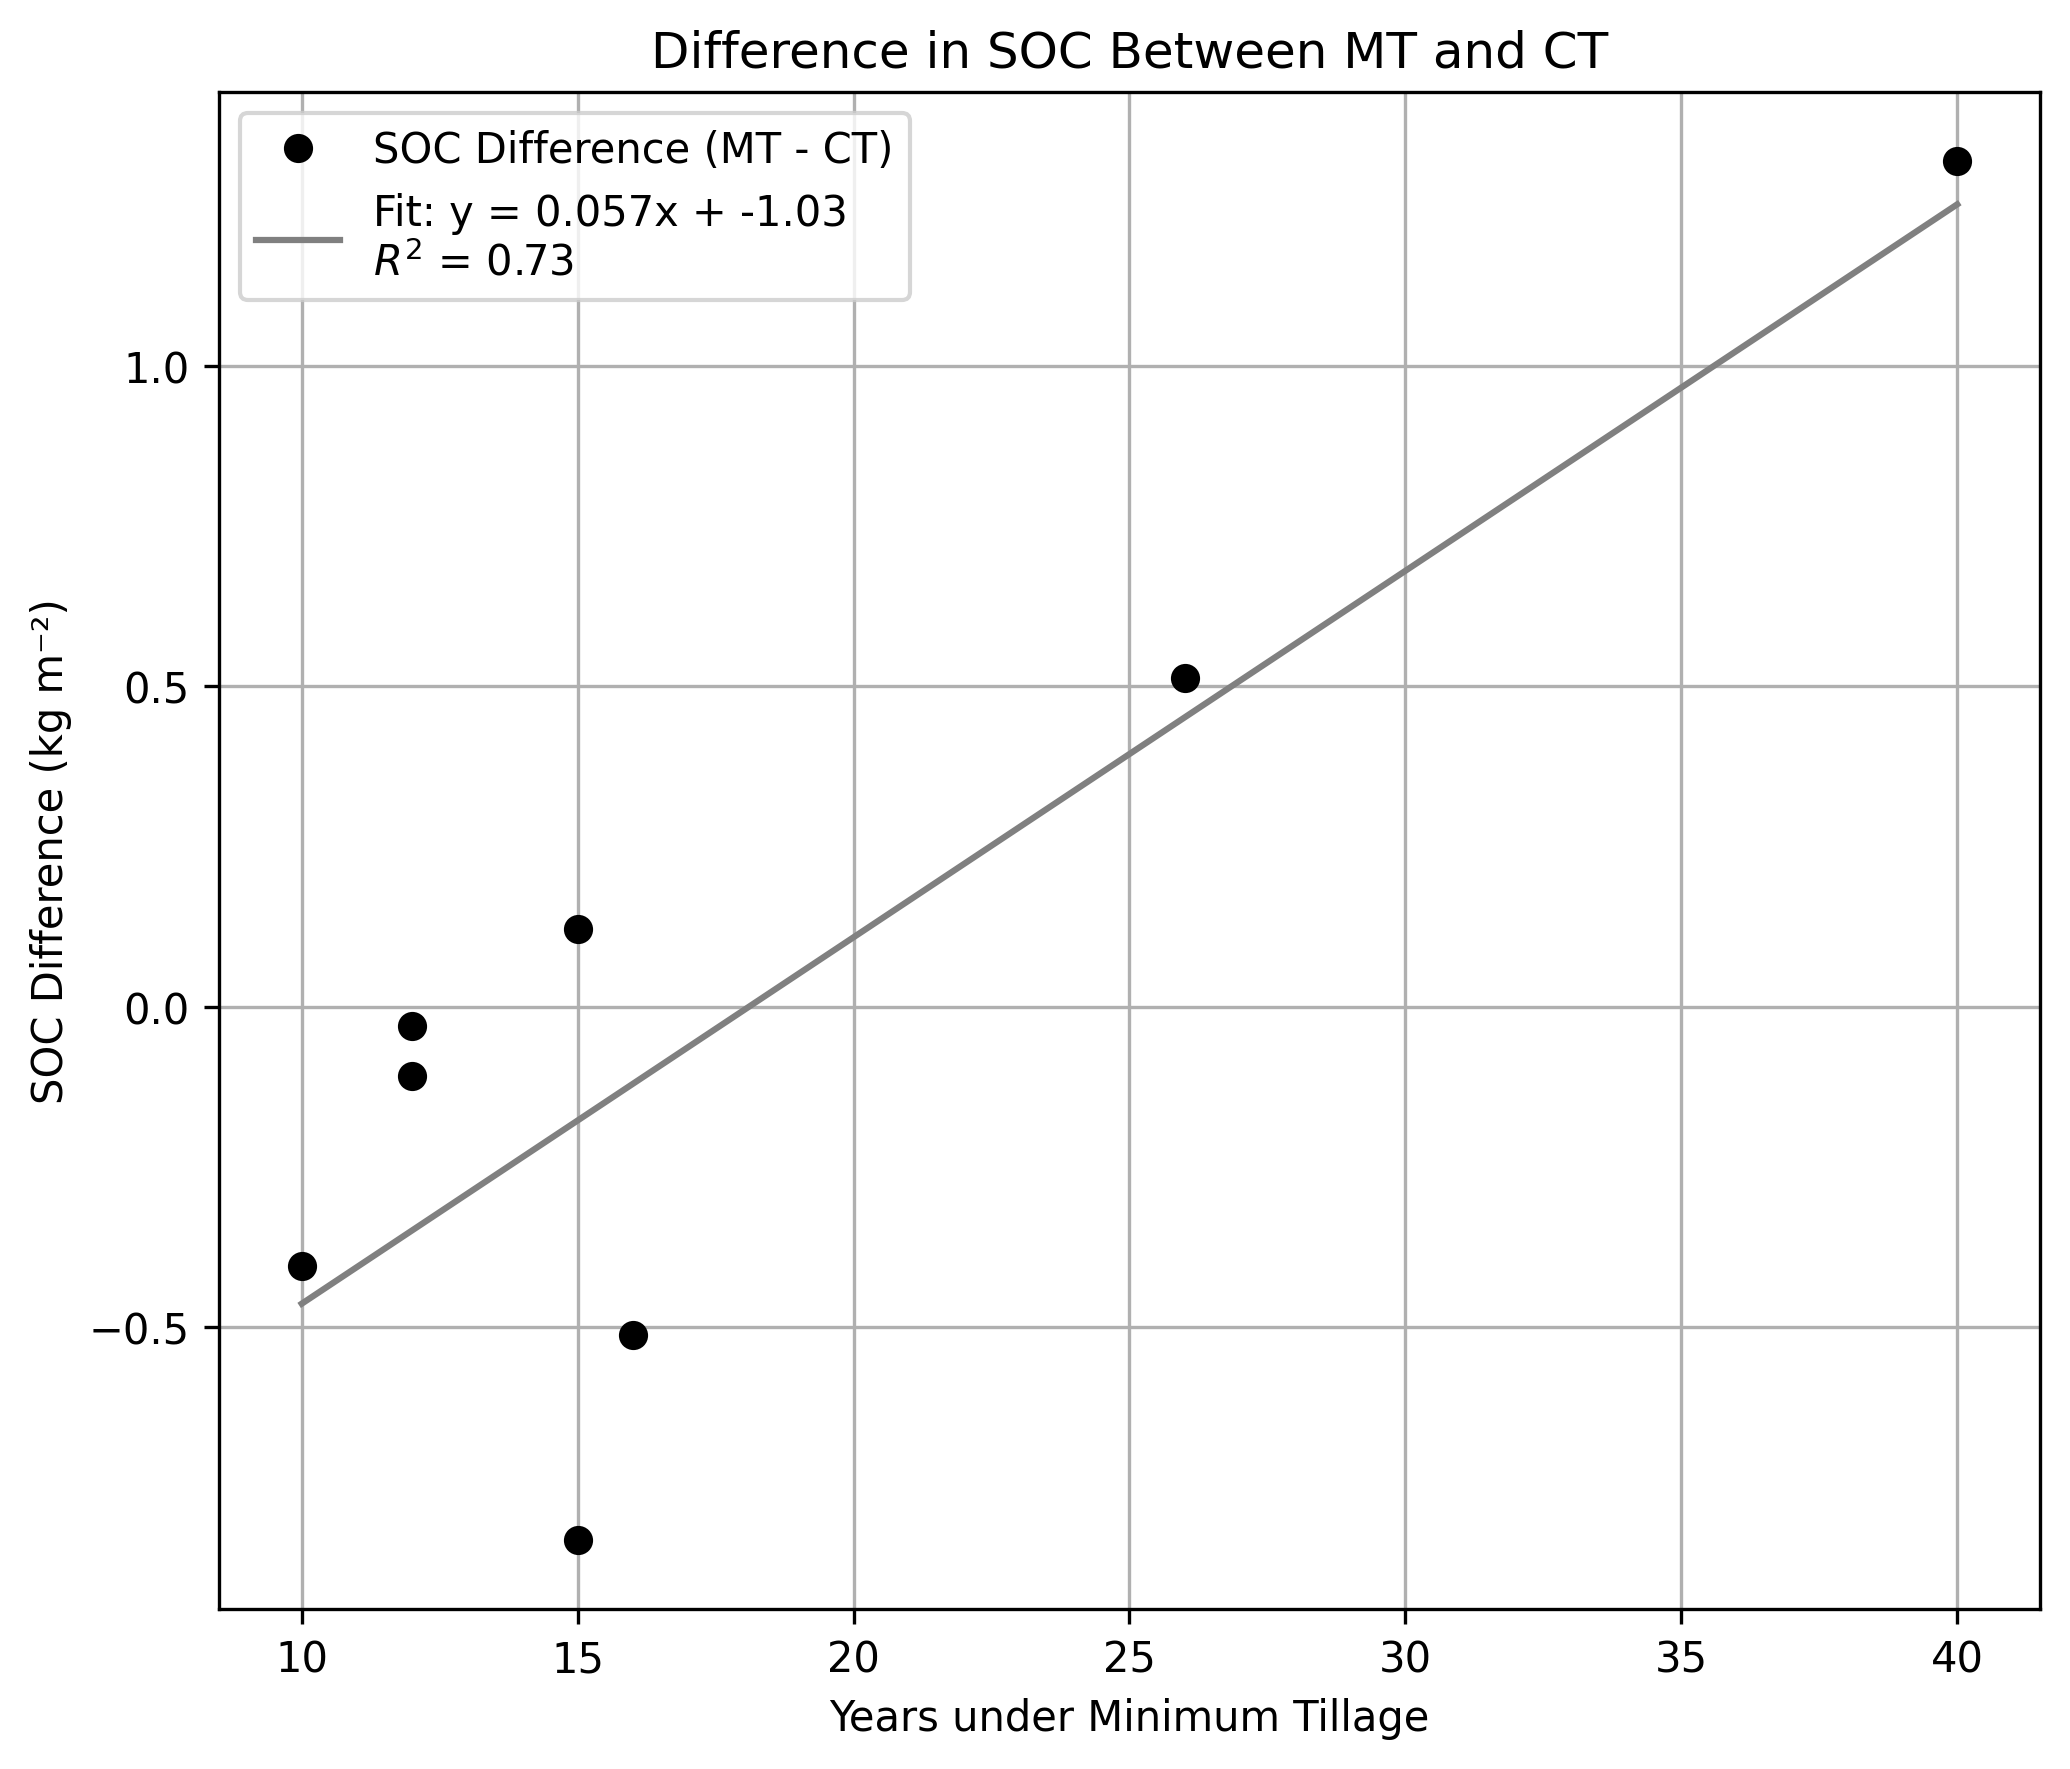

In [ ]:
# Regression
X = df["Years_MT"].values.reshape(-1, 1)
y = df["SOC_difference"].values
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)
x_vals = np.linspace(df["Years_MT"].min(), df["Years_MT"].max(), 100).reshape(-1, 1)
y_vals = model.predict(x_vals)

# SOC difference plot
plt.figure(figsize=(7, 6), dpi=150)
plt.plot(df["Years_MT"], df["SOC_difference"], 'o', color='black', label='SOC Difference (MT - CT)')
plt.plot(x_vals, y_vals, '-', color='gray', label=f'Fit: y = {slope:.3f}x + {intercept:.2f}\n$R^2$ = {r_squared:.2f}')
plt.xlabel("Years under Minimum Tillage")
plt.ylabel("SOC Difference (kg m⁻²)")
plt.title("Difference in SOC Between MT and CT")
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


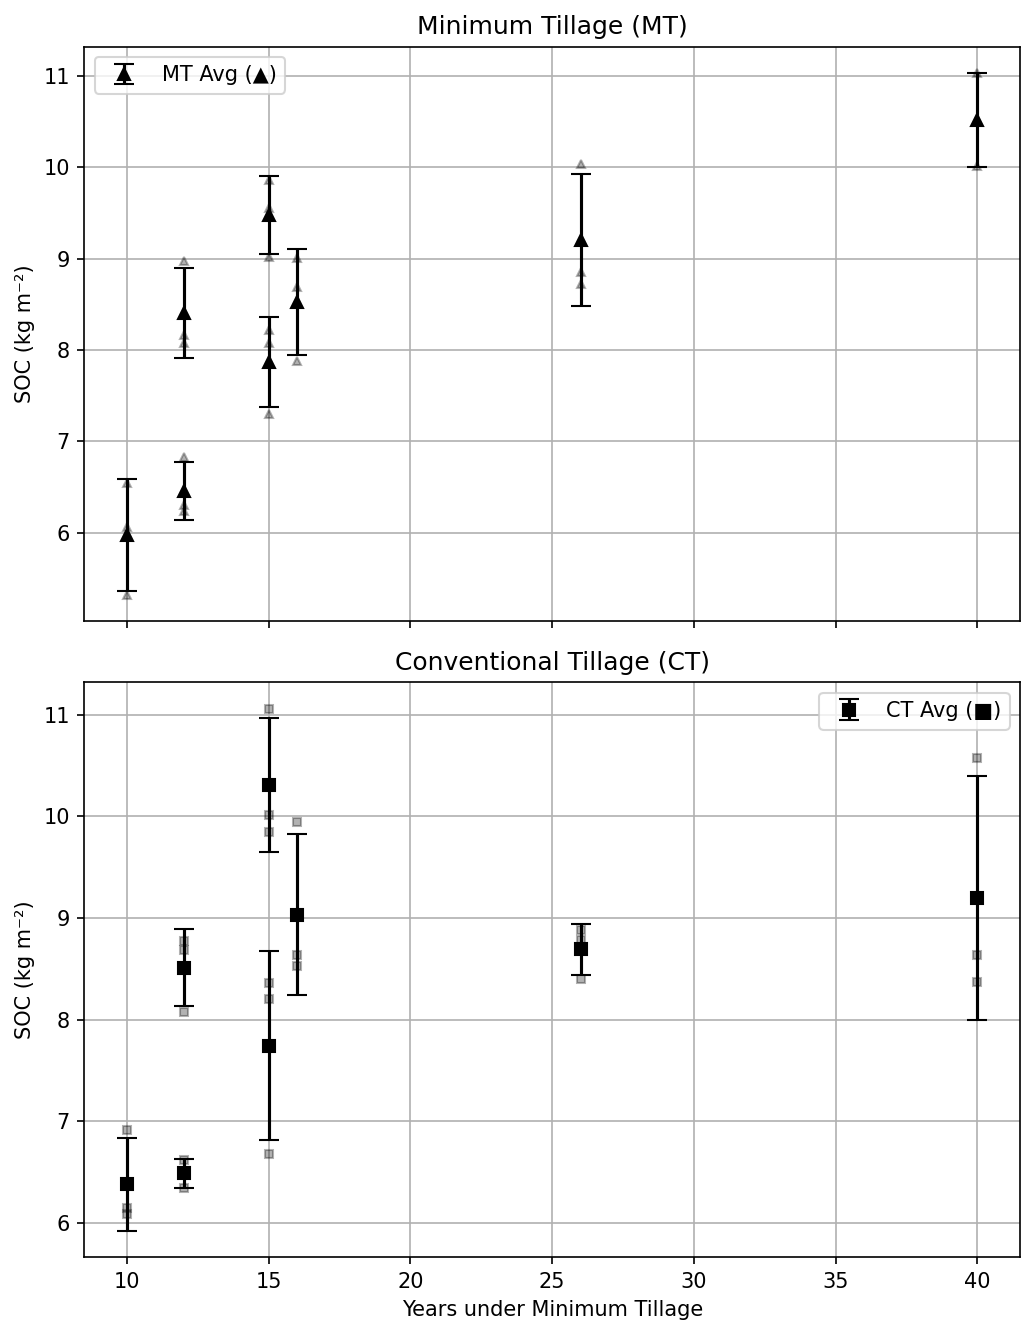

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(7, 9), sharex=True, dpi=150)

# MT plot
ax[0].errorbar(df["Years_MT"], df["MT_avg"], yerr=df["MT_std"], fmt='^', color='black', label='MT Avg (▲)', capsize=5, linestyle='none')
for i, row in df.iterrows():
    ax[0].plot([row["Years_MT"]] * 3, [row["MT-1"], row["MT-2"], row["MT-3"]], '^', color='black', alpha=0.3, markersize=4)
ax[0].set_ylabel("SOC (kg m⁻²)")
ax[0].set_title("Minimum Tillage (MT)")
ax[0].grid(True)
ax[0].legend()

# CT plot
ax[1].errorbar(df["Years_MT"], df["CT_avg"], yerr=df["CT_std"], fmt='s', color='black', label='CT Avg (■)', capsize=5, linestyle='none')
for i, row in df.iterrows():
    ax[1].plot([row["Years_MT"]] * 3, [row["CT-1"], row["CT-2"], row["CT-3"]], 's', color='black', alpha=0.3, markersize=4)
ax[1].set_xlabel("Years under Minimum Tillage")
ax[1].set_ylabel("SOC (kg m⁻²)")
ax[1].set_title("Conventional Tillage (CT)")
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()


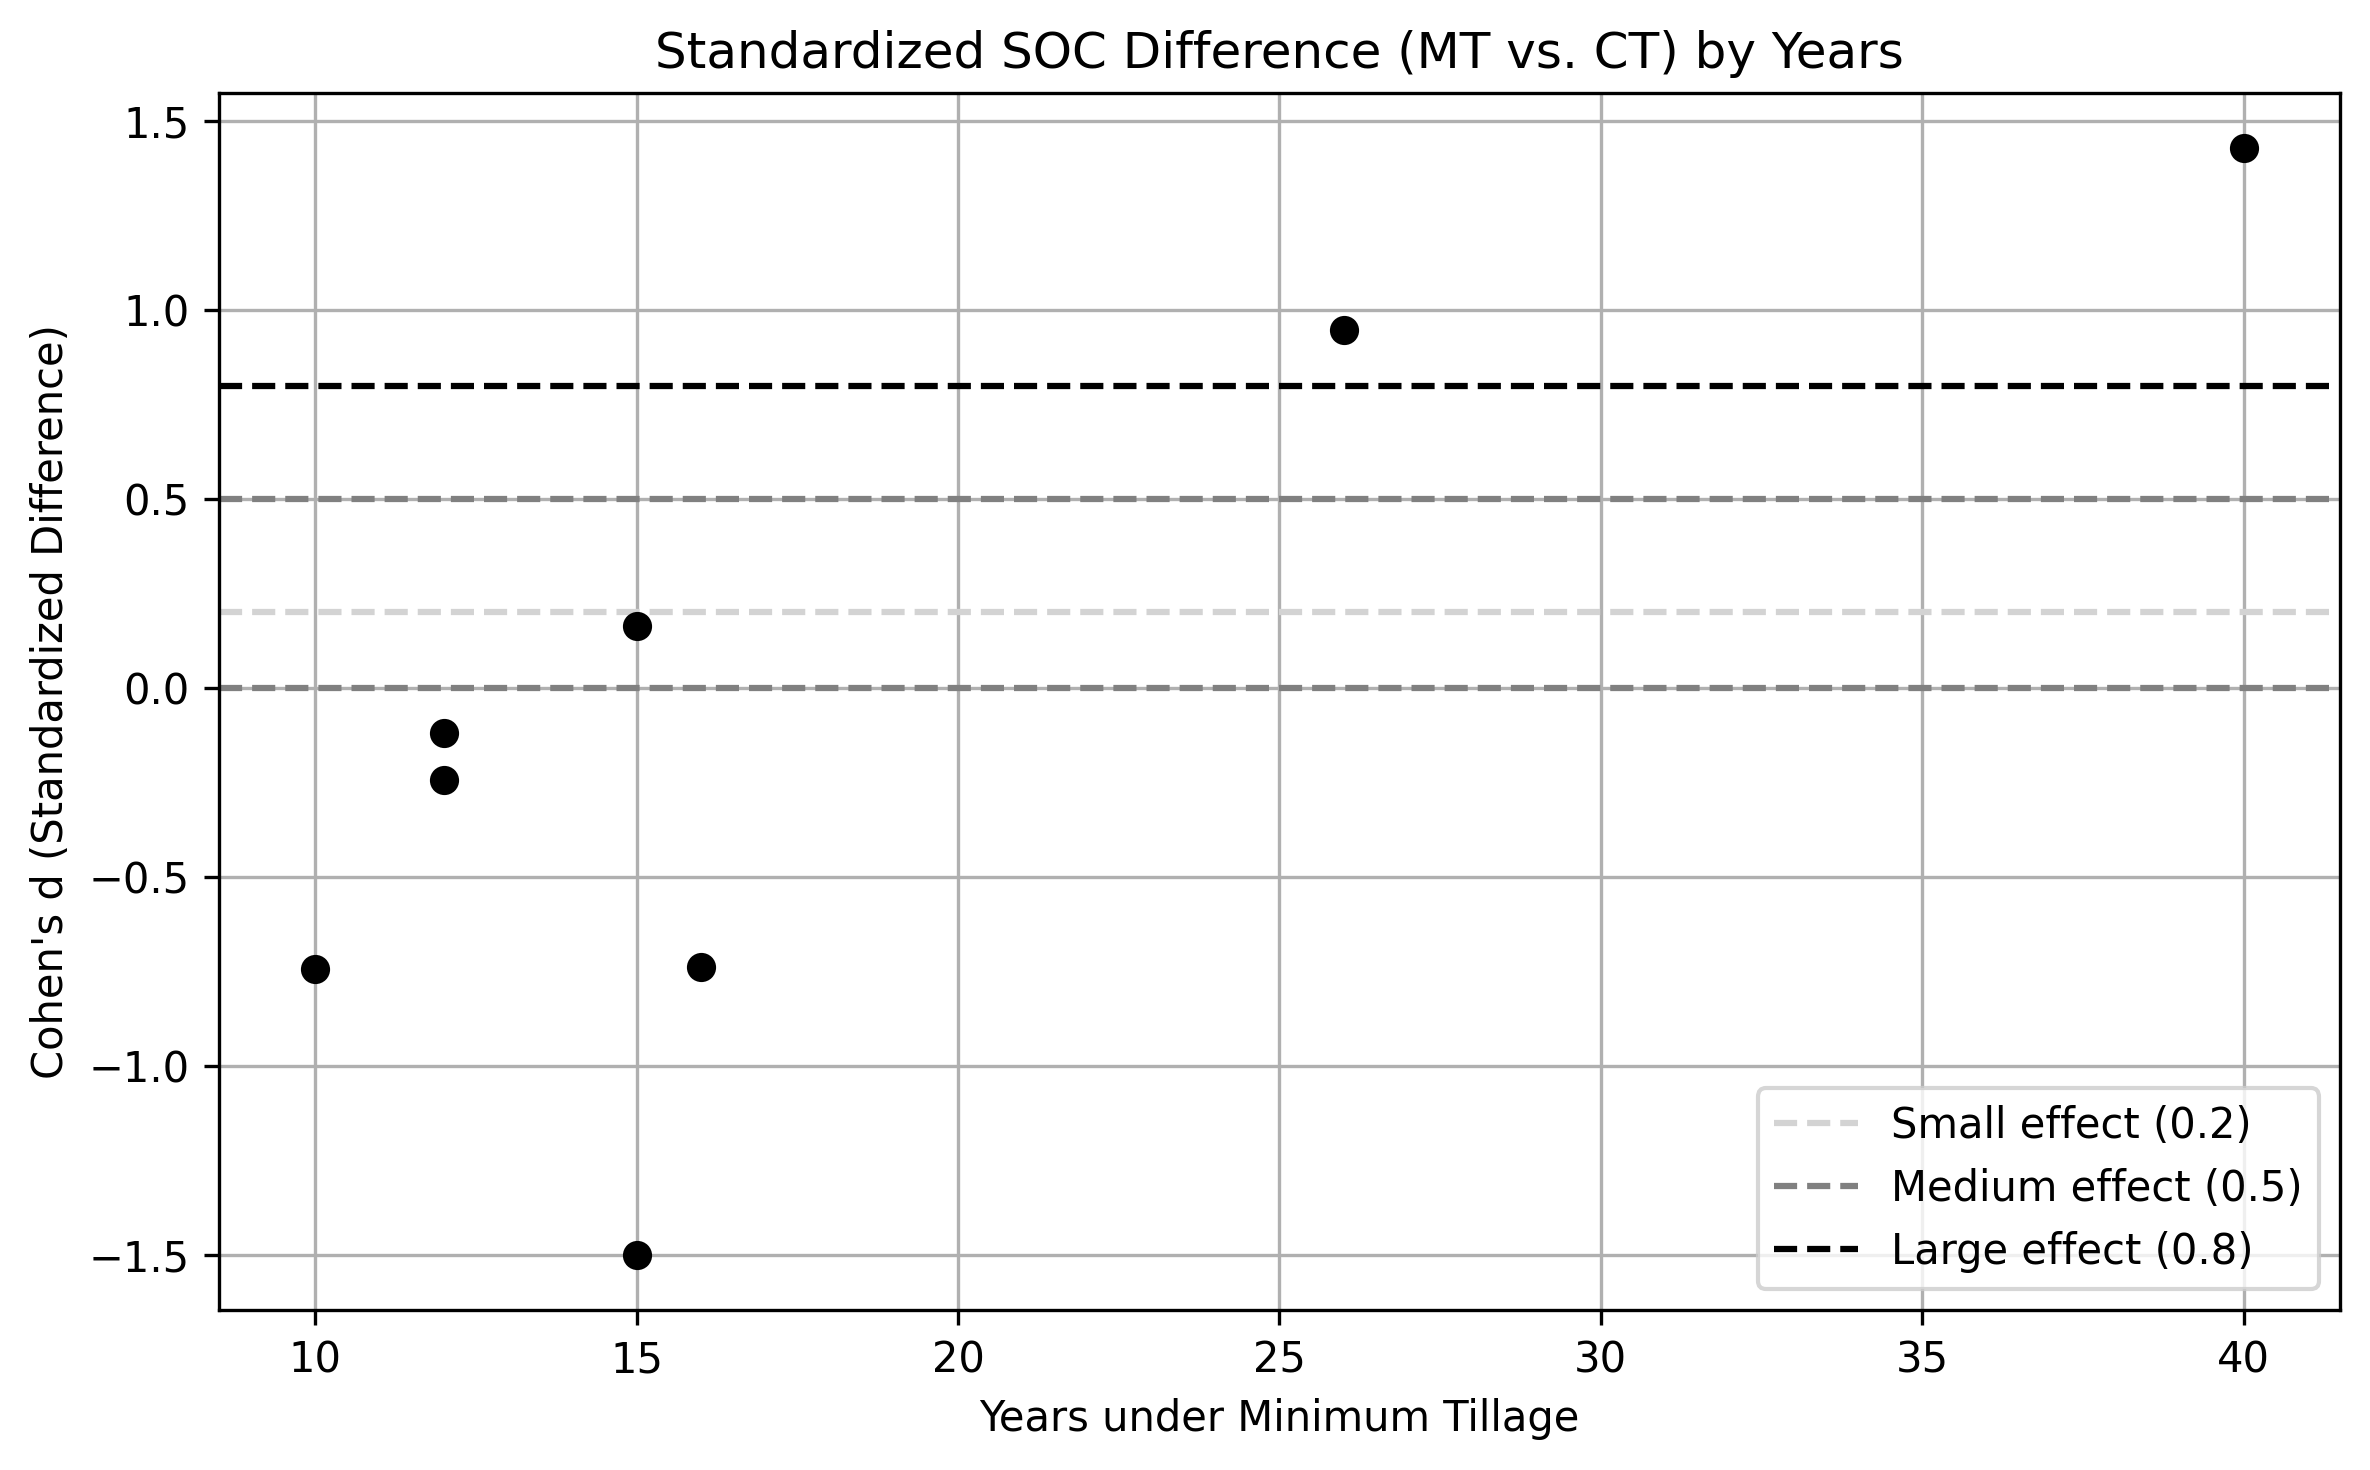

In [5]:


# Pooled std and Cohen's d
df["std_pooled"] = np.sqrt((df["MT_std"]**2 + df["CT_std"]**2) / 2)
df["cohens_d"] = (df["MT_avg"] - df["CT_avg"]) / df["std_pooled"]

# Plot Cohen's d
plt.figure(figsize=(8, 5), dpi=300)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(0.2, color='lightgray', linestyle='--', label='Small effect (0.2)')
plt.axhline(0.5, color='gray', linestyle='--', label='Medium effect (0.5)')
plt.axhline(0.8, color='black', linestyle='--', label='Large effect (0.8)')

plt.plot(df["Years_MT"], df["cohens_d"], 'o', color='black')
plt.xlabel("Years under Minimum Tillage")
plt.ylabel("Cohen's d (Standardized Difference)")
plt.title("Standardized SOC Difference (MT vs. CT) by Years")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()

# Save the figure
#cohen_fig_path = "/mnt/data/SOC_cohens_d_plot_highres.png"
#plt.savefig(cohen_fig_path, dpi=600)
plt.show()

#cohen_fig_path
